## Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Nagaraj U\Downloads\anaconda

## Constants

In [2]:
VOCABULARY_SIZE = 2500

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'


## Load data

In [3]:
#features
X_test = np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
#target
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
#token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ')

In [4]:
X_test.shape

(1724, 2500)

In [5]:
y_test.shape

(1724,)

In [6]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculating joint probability

#### Dot product

In [7]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [8]:
a.dot(b)

26

In [9]:
c = np.array([[1,2],[3,4],[5,6]]) # a = 1*3  c = 3 * 2   dot product = 1 * 2
a.dot(c)

array([22, 28])

## Dimension of dot product between X_test and prob_token_spam

In [10]:
X_test.shape

(1724, 2500)

In [11]:
prob_token_spam.shape

(2500,)

In [12]:
print(f' shape of dot product is : {X_test.dot(prob_token_spam).shape}')

 shape of dot product is : (1724,)


## Set the prior

 $$ P(spam \, | \, X ) = \frac{ \, P(X \, | \, spam \,) \, p(spam \,)}  { P(X) }$$

In [13]:
PROB_SPAM =  0.311


In [14]:
# Taking log to make it easier for calculations

# P(spam|X) = p(X|spam)*p(spam)/p(X)  can be written as P(spam|X) = log(p(X|spam)) + log(p(spam)) - log(p(X))

In [15]:
np.log(prob_token_spam)

array([ -4.40963866,  -5.25218373,  -4.98751608, ..., -11.39851299,
        -9.04713774, -12.09166017])

## Joint probability in log format

PROB_SPAM = probability of emails is spam , 
prob_all_tokens = probability of all tokens occurs in email ,
prob_token_spam = probability of token present given email is spam,
ABOVE 3 PARAMETERS ARE TAKEN FROM TRAINING SET DATA CALCULATIONS IN PREVIOUS MODULE

In [16]:
# calculating probablity of emails being spam for all testing dataset based on values we got fron training model 

joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM) 

In [17]:
joint_log_spam[:5]

array([23.68263379,  2.14462397, 18.28969754, 17.96820105, 21.05744097])

 $$ P(ham \, | \, X ) = \frac{ \, P(X \, | \, ham \,) \, p(ham \,)}  { P(X) }$$

In [18]:
# calculating probablity of emails being non-spam for all testing dataset based on values we got fron training model 

joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [19]:
joint_log_ham[:5]

array([-59.91460442, -10.99324663, -35.07298791, -59.57990336,
       -54.17177405])

In [20]:
joint_log_ham.size

1724

In [21]:
joint_log_spam.size

1724

## Making predictions

### checking for higher joint probability

$$ P(Spam \, | \, X \,) > P(Ham \, | X ) $$

In [22]:
predictions = joint_log_spam > joint_log_ham

In [23]:
predictions[-8:] * 1

array([0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
y_test[-8:]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
predictions.shape

(1724,)

In [26]:
predictions[1333]

False

In [27]:
y_test[1333]

0.0

In [28]:
predictions[980]

False

In [29]:
y_test[980]

0.0

In [30]:
predictions[2]

True

In [31]:
y_test[2]

1.0

In [32]:
predicted_result = []
actual_result = []
num = 100
for i in range(10):
    
    predicted_result.append(predictions[num])
    actual_result.append(y_test[num])
    num += 1
    
print(predicted_result)
print(actual_result)

[True, True, True, True, True, True, True, False, True, True]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Simplifying

### Removing denominator P(X) as we are deviding that to both spam and ham emails so P(spam|X) > P(ham|X) remain uneffected


In [33]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM) 
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [34]:
predictions = joint_log_spam > joint_log_ham

In [35]:
predicted_result = []
actual_result = []
num = 100
for i in range(10):
    
    predicted_result.append(predictions[num])
    actual_result.append(y_test[num])
    num += 1
    
print(predicted_result)
print(actual_result)

[True, True, True, True, True, True, True, False, True, True]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Metrics and Accuracy

In [36]:
#Accuracy

nr_correct_predictions = (y_test == predictions).sum()
print(f'Number of emails classified correctly are : {nr_correct_predictions}')
nr_wrong_predictions = X_test.shape[0] - nr_correct_predictions
print(f'Number of wrong predictions : {nr_wrong_predictions}')

Number of emails classified correctly are : 1685
Number of wrong predictions : 39


In [37]:
y_test[(y_test != predictions)]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [38]:
predictions[(y_test != predictions)]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [39]:
accuracy = nr_correct_predictions/len(X_test) * 100
print(f' Accuracy of model is : {round(accuracy,2)}%')

 Accuracy of model is : 97.74%


In [40]:
frac_wrong = nr_wrong_predictions/len(X_test) * 100
print(f'Fraction of wrong predictions : {round(frac_wrong,2)}%')

Fraction of wrong predictions : 2.26%


## Visualising the results

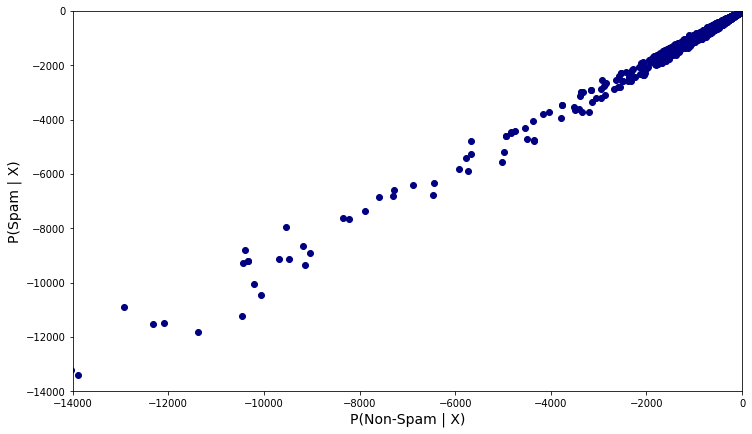

In [48]:
# Chart styling info

xaxis_label = 'P(Non-Spam | X)'
yaxis_label = 'P(Spam | X)'

plt.figure(figsize=(12,7))
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize=14)

#Set limits
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy')
plt.show()

## Decision boundary

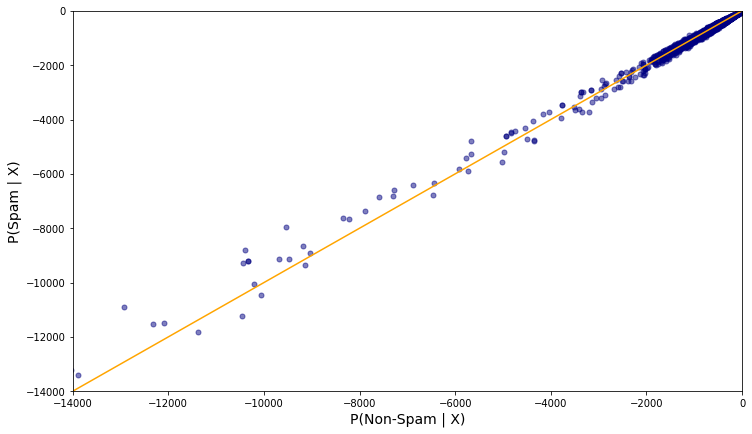

In [51]:
# Chart styling info

xaxis_label = 'P(Non-Spam | X)'
yaxis_label = 'P(Spam | X)'

linedata = np.linspace(start=-14000,stop=1,num=1000)

plt.figure(figsize=(12,7))
plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize=14)

#Set limits
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')
plt.show()

## Creating two sub plots side by side

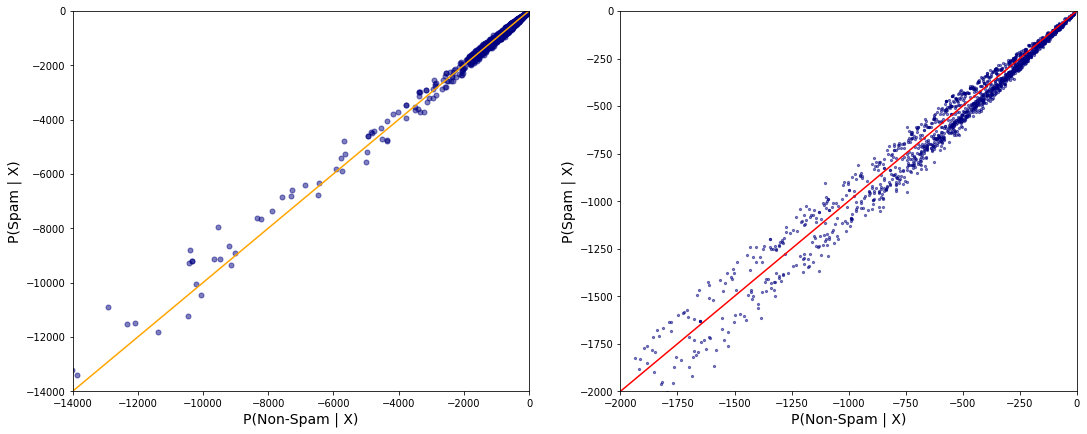

In [58]:
# Chart styling info

xaxis_label = 'P(Non-Spam | X)'
yaxis_label = 'P(Spam | X)'

linedata = np.linspace(start=-14000,stop=1,num=1000) # for plotting diagonal line
plt.figure(figsize=(18,7))

#CREATING TWO SEPARATE CHARTS SIDE BY SIDE

#Chart number : 1
plt.subplot(1,2,1)  # 1:rows 2:columns 1:index

plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize=14)

#Set limits
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=25)
plt.plot(linedata,linedata,color='orange')


#Chart number : 2
plt.subplot(1,2,2)

plt.xlabel(xaxis_label,fontsize = 14)
plt.ylabel(yaxis_label,fontsize=14)

#Set limits
plt.xlim([-2000,1])  # reducing limits to get clear scatters
plt.ylim([-2000,1])

plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.5,s=5)
plt.plot(linedata,linedata,color='red')
plt.show()

## Chart using seaborn

In [60]:
sns.set_style='whitegrid'
labels = 'Actual category'

#creating DF with xaxis_label : column names for ham probs , yaxis_label : column names for spam, labels :column name for labels
summary_df = pd.DataFrame({xaxis_label : joint_log_ham,yaxis_label : joint_log_spam, labels : y_test}) #concatinating all three

C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


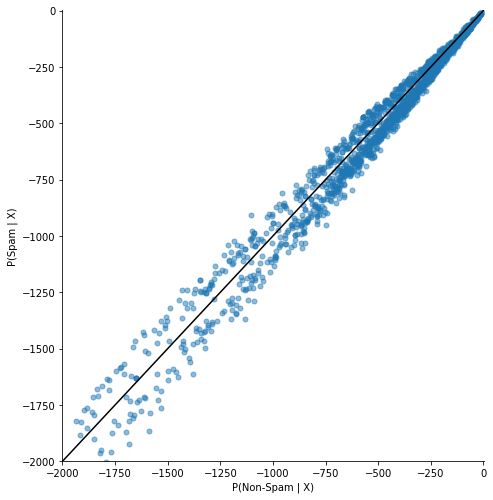

In [72]:

sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df, size=7,fit_reg=False,
          scatter_kws={'alpha': 0.5 , 's' : 25})
plt.xlim([-2000,1])  # reducing limits to get clear scatters
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.show()

## Adding legends and label colors

C:\Users\Nagaraj U\Downloads\anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


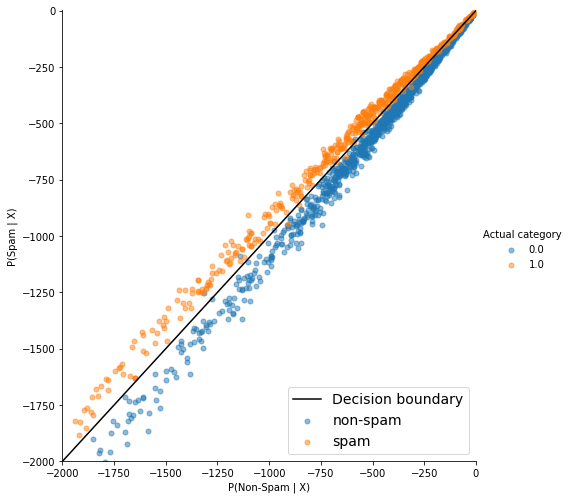

In [74]:

sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df, size=7,fit_reg=False,
          scatter_kws={'alpha': 0.5 , 's' : 25},hue=labels)
plt.xlim([-2000,1])  # reducing limits to get clear scatters
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Decision boundary','non-spam','spam'),loc='lower right',fontsize=14)
plt.show()

## False positives and False negatives

In [77]:
np.unique(predictions,return_counts=True)  # 1136 : ham 588 : spam  ; according to model

(array([False,  True]), array([1136,  588], dtype=int64))

In [79]:
true_positives = (predictions == 1) & (y_test == 1)
true_positives.sum()

569

In [80]:
true_negatives = (predictions == 0) & (y_test == 0)
true_negatives.sum()

1116

In [81]:
false_positives = (predictions == 1) & (y_test == 0)
false_positives.sum()

19

In [82]:
false_negatives = (predictions == 0) & (y_test == 1)
false_negatives.sum()

20

In [83]:
569 + 1116 + 19 + 20

1724

In [85]:
X_test.shape[0]

1724

## Recall score

#### recall-score  = true_positives / (true_positives + false_negatives)

In [86]:
recall_score = true_positives.sum()/(true_positives.sum() + false_negatives.sum())

In [88]:
print(f'Recall score is : {round((recall_score),2) * 100}% ')

Recall score is : 97.0% 
